### Exercise 1 (4 Points):

##### Use our toy data set to train a Logistic Regression and a Random Forest model (use the `totalAmount` and the `cartItem` features). Predict on the test data and use the results to plot a ROC curve for each classifier, like shown here (https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics). Plot the two curves in one plot and also show the area-under-curve for each curve in the plot. Use the sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) library for this.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
transactions = pd.read_csv('data/data.csv')
from sklearn import preprocessing

transactions.drop(['Unnamed: 0'], axis=1, inplace=True)

transactions = transactions[['totalAmount','c_0','c_1','c_2','c_3','c_4','c_5', 'returnLabel']]
transactions.head()

,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5,returnLabel
0,240,1,0,3,1,3,0,0
1,79,0,0,1,0,0,0,0
2,24,0,0,1,1,0,0,0
3,504,0,3,0,0,1,2,0
4,190,1,0,1,1,2,0,0


In [3]:
from sklearn.model_selection import train_test_split

X = transactions.drop('returnLabel',axis=1)
y = transactions.returnLabel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(solver='liblinear')
reg_model.fit(X_train, y_train)

reg_probs = reg_model.predict_proba(X_test)[:, 1]

In [5]:
from sklearn.ensemble import RandomForestClassifier

for_model = RandomForestClassifier(n_estimators=9000)
for_model.fit(X_train, y_train)

for_probs = for_model.predict_proba(X_test)[:, 1]

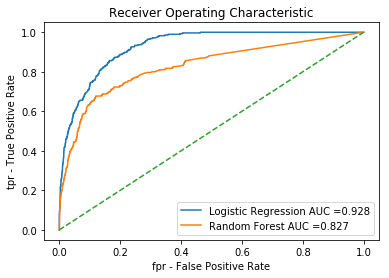

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
reg_auc = roc_auc_score(y_test, reg_probs)
for_auc = roc_auc_score(y_test, for_probs)
# calculate roc curve
reg_fpr, reg_tpr, thresholds = roc_curve(y_test, reg_probs)
for_fpr, for_tpr, thresholds = roc_curve(y_test, for_probs)

# plot the roc curve for the model
plt.plot(reg_fpr, reg_tpr, for_fpr, for_tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.legend(['Logistic Regression AUC ='+str(round(reg_auc,3)), 'Random Forest AUC ='+str(round(for_auc,3))], loc='best')
# naming the axes 
plt.xlabel('fpr - False Positive Rate') 
plt.ylabel('tpr - True Positive Rate') 
  
plt.title('Receiver Operating Characteristic') 

# show the plot
plt.show()